In [ ]:
# Importing required libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [6]:
!pip install wordcloud

In [16]:
df = pd.read_csv('Downloads/INvideos.csv')

In [17]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


### Data Cleaning

In [18]:
df["description"] = df["description"].fillna(value="")

In [19]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

In [ ]:
'''Checking which of the above video_id do not have channel_title and then collecting the video id tag from them'''

In [20]:
count = 0
tag = []
for i in range(len(wanted_groups)):
  focus = wanted_groups[i]
  if(len(focus['channel_title'].value_counts())!=len(focus['video_id'].value_counts())):
    count+=1
    tag.append(focus['video_id'].values[0])

In [ ]:
'''By observing tag we gain that only first two element of the list have different video id and channel;
title count so we create a new list wanted_g which only contain all video_id which are not actually missing values'''

In [21]:
tag

['#NAME?', '#VALUE!']

In [ ]:
'''So, turns out there are 2 sets of data with video_id #NAME? and #VALUE!.;
These rows needs to be removed as they are missing values or have either been incorrectly labelled.;
So. let's get rid of these two kind of rows from the dataset.'''

In [22]:
df = df[df.video_id != '#NAME?']
df = df[df.video_id != '#VALUE!']

In [28]:
#The following code is just a configuration for improving visualization graphs.

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300000000)

### Dataset Collection years

In [ ]:
#Let's see in which years the dataset was collected

ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

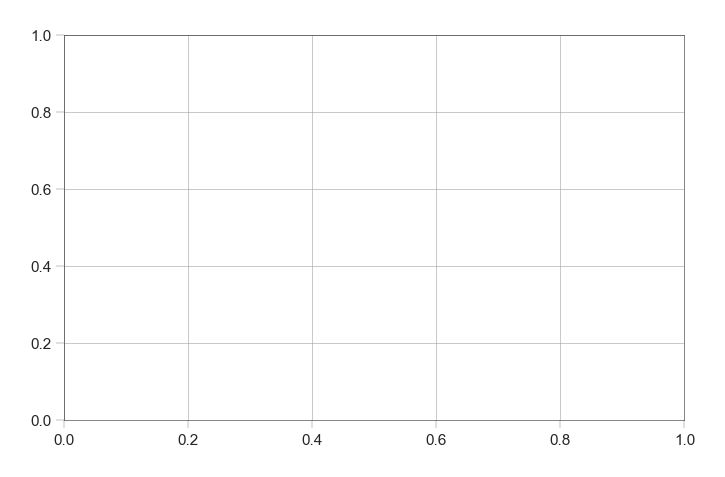

In [42]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
a= ax.set(xlabel="Year", ylabel="No. of videos")

In [32]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

trending_date
2018   0.76
2017   0.24
Name: proportion, dtype: float64

### Descriptive Analysis

In [33]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,36834.00,36834.00,36834.00,36834.00,36834.00
mean,21.58,1054573.46,26986.94,1666.99,2677.89
std,6.56,3180225.42,97419.65,16183.63,14957.12
min,1.00,4024.00,0.00,0.00,0.00
25%,23.00,123761.25,864.00,108.00,81.00
50%,24.00,303955.00,3072.00,326.00,330.00
75%,24.00,798462.00,13758.00,1018.00,1280.00
max,43.00,125432237.00,2912710.00,1545017.00,827755.00


In [ ]:
'''We note from the table above that

1. The average number of views of a trending video is 1,060,477. The median values for the number of views is 304,586, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
2. The average number of likes of a trending video is 27,082, while the average number of dislikes is 1,665.
3. The average comment count is 2,677 while the median is '329`.
'''

In [ ]:
''' Let's plot a histogram for the views column to take a look at its distribution;
to see how many videos have between 10 million and 20 million views, and so on.'''

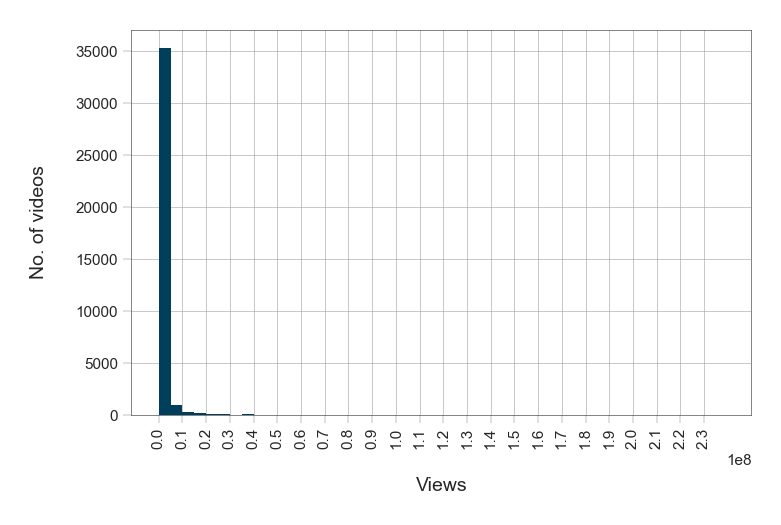

In [43]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

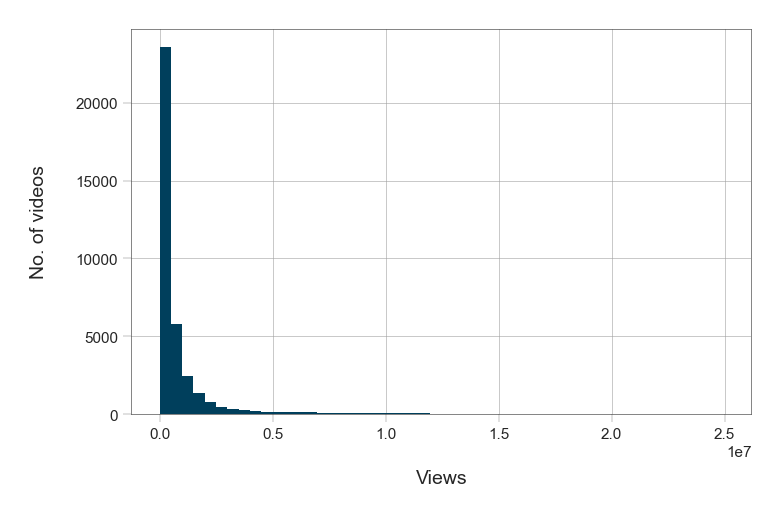

In [44]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")


In [ ]:
#Now, we see that majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views.

In [45]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

79.60579899006352

In [ ]:
'''So, it is around 80%. Similarly, we can see that the percentage of videos with less than 1.5 million views is around 86%
and the percentage of videos with less than 5 million views is around 96%.'''

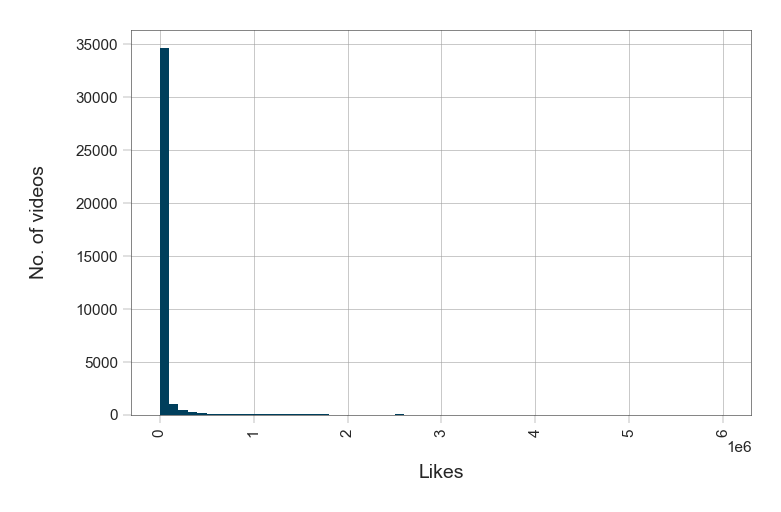

In [46]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

In [ ]:
'''We note that the vast majority of trending videos have between 0 and 1000,000 likes.
Let us plot the histogram just for videos with 100,000 or less to get a closer look at the distribution of the data.'''

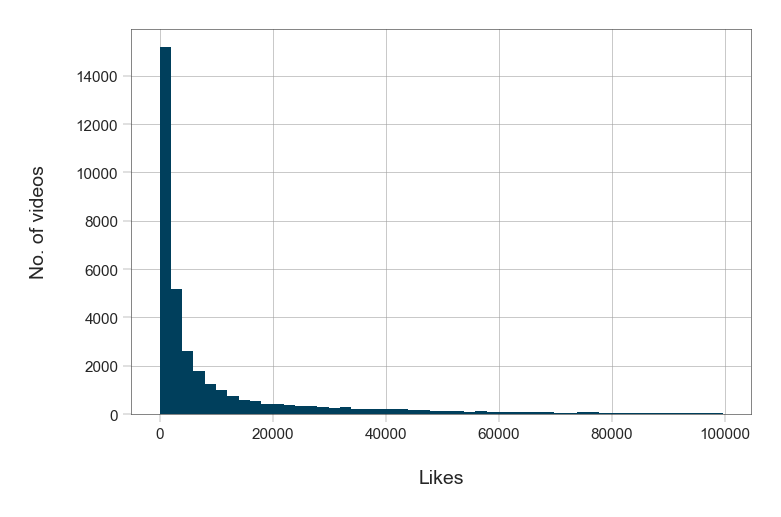

In [47]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [ ]:
'''Now, we can see that the majority of trending videos have 20000 likes or less with a peak for videos with 2000 likes or less.

Let's see the exact percentage of videos with less than 20000 likes. Also see the percentage of videos less than 100000 likes'''

In [48]:
df[df['likes'] < 2e4]['likes'].count() / df['likes'].count() * 100

79.36960417006027

In [49]:
df[df['likes'] < 1e5]['likes'].count() / df['likes'].count() * 100

94.15214204267795

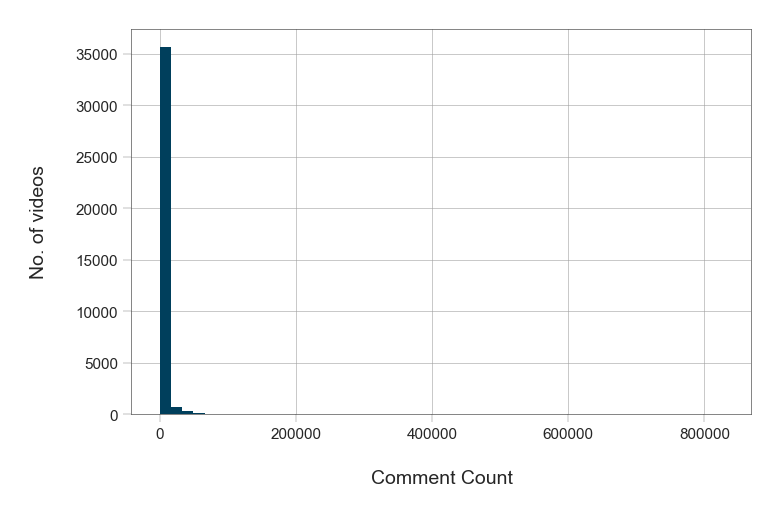

In [50]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")


In [ ]:
#Let's get a closer look by eliminating entries with comment count larger than 100000 comment.

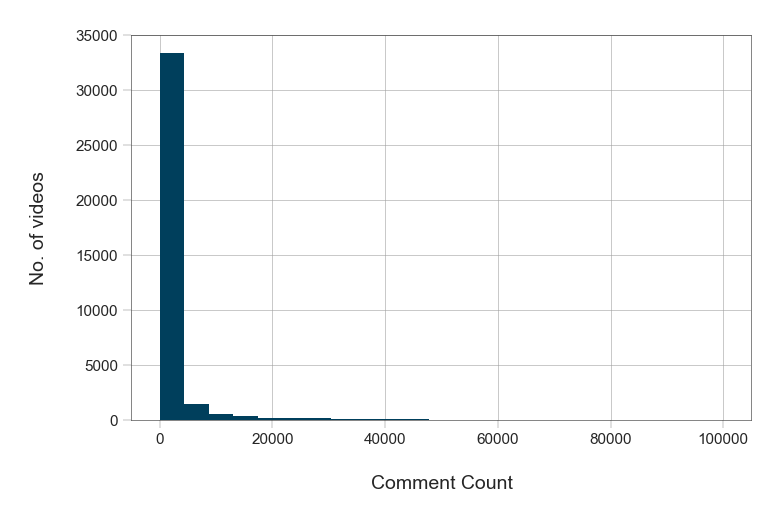

In [51]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 100000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 1e5, 24), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [ ]:
# We see that most trending videos have around 20000/5 = 4000 comments since each division in the graph has six histogram bins.

In [ ]:
# As with views and likes, let's see the exact percentage of videos with less than 4000 comments.

In [52]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

89.84362273985991

### Descriptive analysis on Non Numerical data

In [53]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,36834,36834,36834,36834,36834,36834,36834,36834
unique,16305,205,16506,1423,16123,12415,16307,13801
top,rRr1qiJRsXk,17.13.12,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,
freq,16,200,19,280,18,1365,16,558


In [55]:
classed = df.groupby("video_id")
classes = []
wanted_classes = []
for key, item in classed:
    classes.append(classed.get_group(key))

for g in classes:
    if len(g['title'].unique()) != 1:
        wanted_classes.append(g)

wanted_classes[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
21826,05KG0F86lJc,18.16.03,Sri Reddy Leaks: Tollywood Top Heroine Sexual ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,955382,3297,709,1353,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Sexual ...
21994,05KG0F86lJc,18.17.03,Sri Reddy Leaks: Tollywood Top Heroine Committ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,1693269,4691,1254,1657,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Committ...
22143,05KG0F86lJc,18.17.03,Sri Reddy Leaks: Tollywood Top Heroine Committ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,1693269,4691,1254,1657,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Committ...
22196,05KG0F86lJc,18.18.03,Sri Reddy Leaks: Tollywood Top Heroine Committ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,2079090,5393,1559,1878,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Committ...
22344,05KG0F86lJc,18.18.03,Sri Reddy Leaks: Tollywood Top Heroine Committ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,2079090,5393,1559,1878,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Committ...
22409,05KG0F86lJc,18.19.03,Sri Reddy Leaks: Tollywood Top Heroine Committ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,2278394,5642,1683,1934,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Committ...
22553,05KG0F86lJc,18.19.03,Sri Reddy Leaks: Tollywood Top Heroine Committ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,2278394,5642,1683,1934,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Committ...
22661,05KG0F86lJc,18.20.03,Sri Reddy Leaks: Tollywood Top Heroine Committ...,Mahaa News,25,2018-03-15T15:41:30.000Z,Actress Sri Reddy Aggressive Speech On Telugu ...,2397699,5763,1750,2004,https://i.ytimg.com/vi/05KG0F86lJc/default.jpg,False,False,False,Sri Reddy Leaks: Tollywood Top Heroine Committ...


### CORRELATION BETWEEN DATASET VARIABLE

In [60]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
correlation_matrix

,category_id,views,likes,dislikes,comment_count
category_id,1.00,-0.18,-0.12,-0.04,-0.03
views,-0.18,1.00,0.85,0.55,0.68
likes,-0.12,0.85,1.00,0.49,0.78
dislikes,-0.04,0.55,0.49,1.00,0.71
comment_count,-0.03,0.68,0.78,0.71,1.00


In [ ]:
'''We see for example that views and likes are highly positively correlated with a correlation value of 0.85;
we see also a high positive correlation (0.78) between likes and comment count, and between dislikes and comment count (0.71).
There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.'''

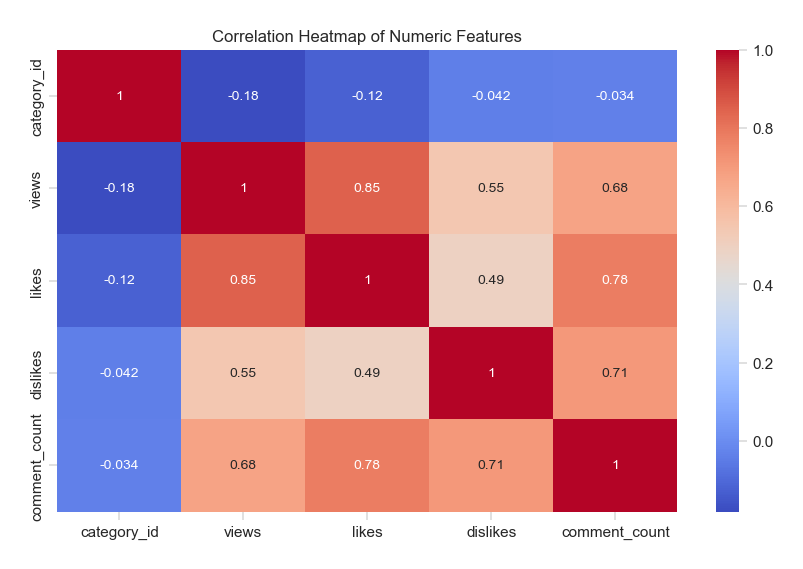

In [65]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

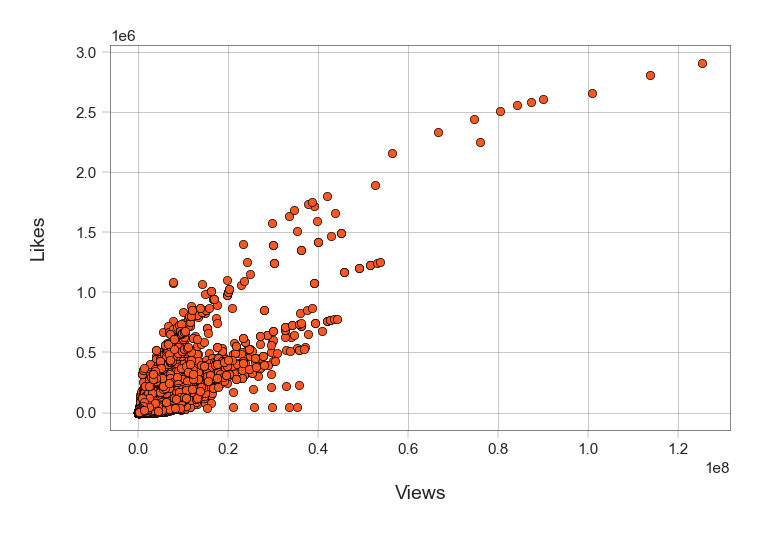

In [66]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [ ]:
'''We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.'''

### Most Common words in Video Titles

In [67]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 41351),
 ('-', 15533),
 ('2018', 6702),
 ('Episode', 4126),
 ('||', 3666),
 ('Full', 1935),
 ('The', 1857),
 ('Movie', 1820),
 ('Song', 1804),
 ('2017', 1681),
 ('Telugu', 1661),
 ('News', 1597),
 ('&', 1576),
 ('Video', 1575),
 ('Latest', 1407),
 ('Official', 1365),
 (':', 1288),
 ('to', 1285),
 ('Trailer', 1274),
 ('in', 1228),
 ('Songs', 1129),
 ('New', 1127),
 ('2', 1112),
 ('May', 1051),
 ('Punjabi', 1023)]

In [71]:
from wordcloud import WordCloud

In [75]:
#Use video titles
text = " ".join(title for title in df['title'].dropna())

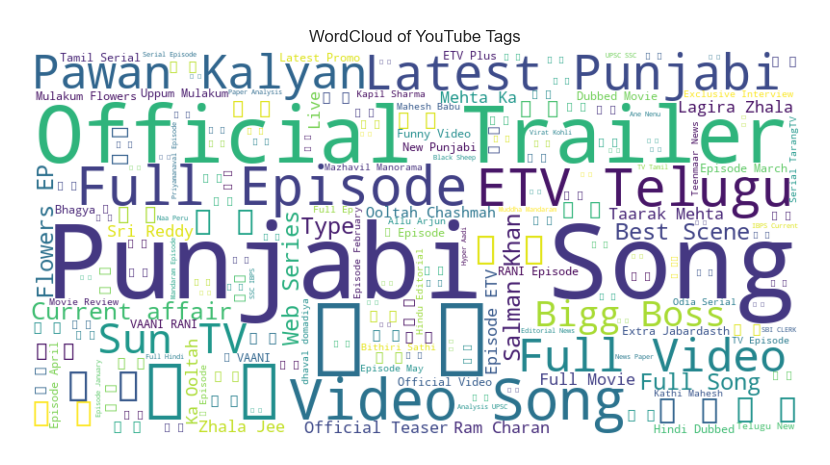

In [77]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of YouTube Tags')
plt.show()

### Video Category with Largest Number of Trending Videos

In [86]:
with open("Downloads/IN_category_id.json") as f:
    categories = json.load(f)["items"]


In [87]:
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

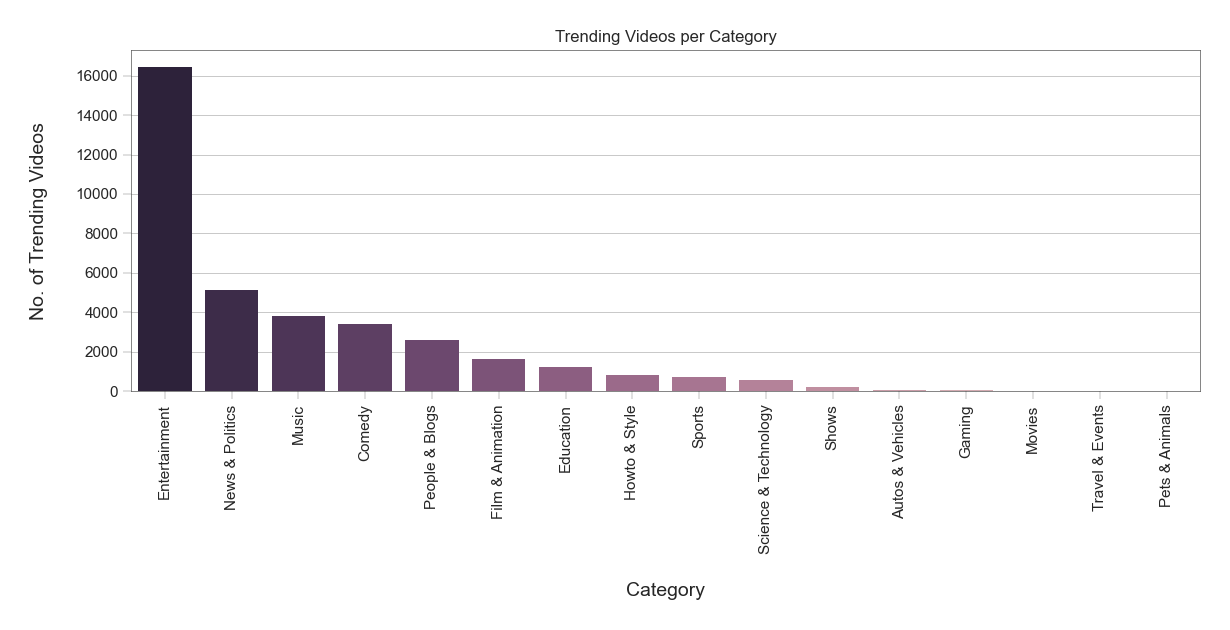

In [91]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.columns = ["category_name", "No_of_videos"]
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    x="category_name",
    y="No_of_videos",
    data=cdf,
    palette=sns.cubehelix_palette(n_colors=len(cdf), reverse=True),
    ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="No. of Trending Videos")
plt.title("Trending Videos per Category")
plt.tight_layout()
plt.show()

### Conclusion